<a href="https://colab.research.google.com/github/hsahbuSM/SENTIMENT-DATASET/blob/main/SENTIMENT_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
df= pd.read_csv(r"/content/sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [302]:
df.shape

(732, 15)

In [303]:
df.drop(columns=['Unnamed: 0.1'],inplace=True)
df.rename(columns={'Unnamed: 0':'Id'}, inplace=True)
df.head()

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [304]:
df.isnull().sum()

Id           0
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [305]:
df.drop(['Id'], axis=1, inplace=True,)

In [306]:
df.isna().any()

Text         False
Sentiment    False
Timestamp    False
User         False
Platform     False
Hashtags     False
Retweets     False
Likes        False
Country      False
Year         False
Month        False
Day          False
Hour         False
dtype: bool

In [307]:
df.dtypes

Text          object
Sentiment     object
Timestamp     object
User          object
Platform      object
Hashtags      object
Retweets     float64
Likes        float64
Country       object
Year           int64
Month          int64
Day            int64
Hour           int64
dtype: object

In [308]:
df.isna().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [309]:
df.Text.duplicated().any()

True

In [310]:
df.Sentiment.value_counts()

 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: Sentiment, Length: 279, dtype: int64

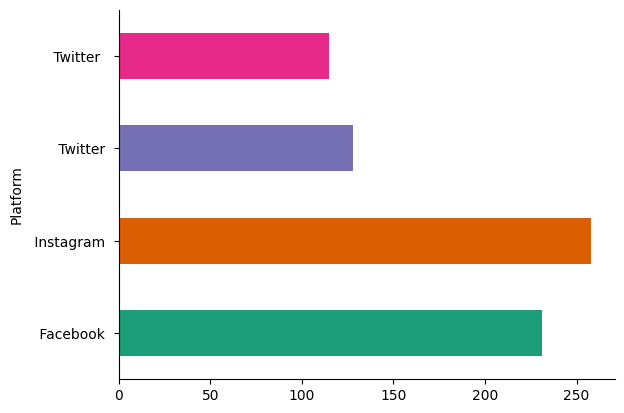

In [311]:
df.groupby('Platform').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

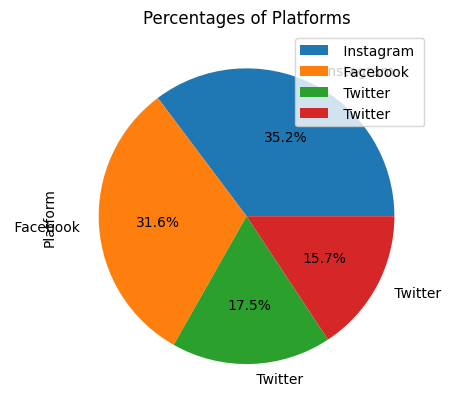

In [312]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

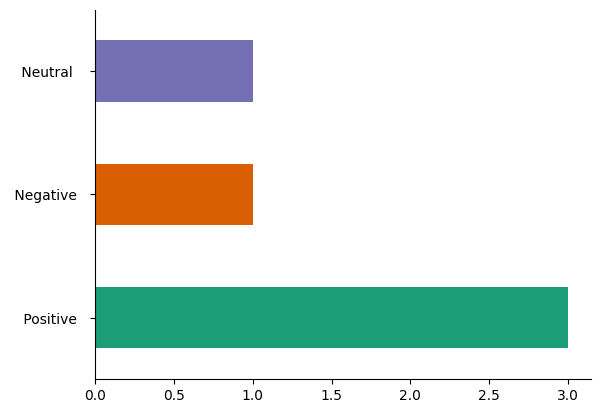

In [313]:
df.head()['Sentiment'].value_counts().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

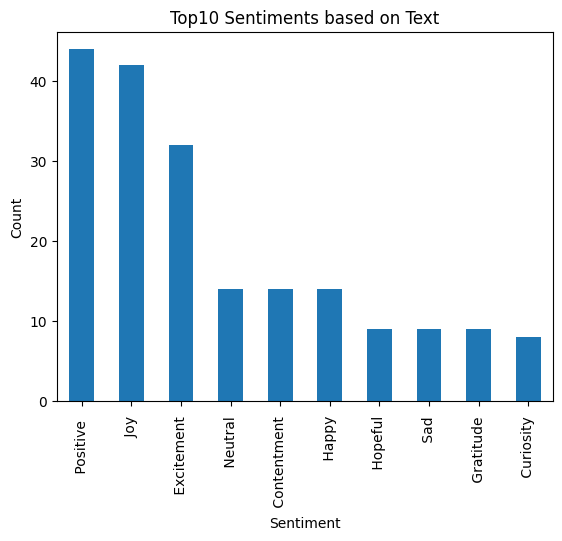

In [314]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [315]:
labels_counts = pd.DataFrame(df.Sentiment.value_counts())

In [316]:
import spacy

In [317]:
nlp = spacy.load("en_core_web_sm")

In [318]:
def preprocess_data(Text):
    tokens = nlp(Text)
    filtered_token = []
    for token in tokens:
        if token.is_punct or token.is_stop:
            continue
        filtered_token.append(token.lemma_)
    return " ".join(filtered_token)

In [319]:
df['preprocessed_data'] = df.Text.apply(preprocess_data)

In [320]:
from sklearn.preprocessing import LabelEncoder

In [321]:
encoder = LabelEncoder()
df.Sentiment = encoder.fit_transform(df.Sentiment)

In [322]:
encoder.classes_

array([' Acceptance   ', ' Acceptance      ', ' Accomplishment ',
       ' Admiration ', ' Admiration   ', ' Admiration    ',
       ' Adoration    ', ' Adrenaline     ', ' Adventure ',
       ' Affection    ', ' Amazement ', ' Ambivalence ',
       ' Ambivalence     ', ' Amusement    ', ' Amusement     ',
       ' Anger        ', ' Anticipation ', ' Anticipation  ',
       ' Anxiety   ', ' Anxiety         ', ' Appreciation  ',
       ' Apprehensive ', ' Arousal       ', ' ArtisticBurst ', ' Awe ',
       ' Awe    ', ' Awe          ', ' Awe           ', ' Bad ',
       ' Betrayal ', ' Betrayal      ', ' Bitter       ', ' Bitterness ',
       ' Bittersweet ', ' Blessed       ', ' Boredom ',
       ' Boredom         ', ' Breakthrough ', ' Calmness     ',
       ' Calmness      ', ' Captivation ', ' Celebration ',
       ' Celestial Wonder ', ' Challenge ', ' Charm ', ' Colorful ',
       ' Compassion', ' Compassion    ', ' Compassionate ',
       ' Confidence    ', ' Confident ', ' Confu

In [323]:
X = df['preprocessed_data']
y = df['Sentiment']

In [324]:
from sklearn.model_selection import train_test_split

In [325]:
x_train, x_test, y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [326]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [327]:
v = TfidfVectorizer()
X_train_normalized = v.fit_transform(x_train)
X_test_normalized = v.transform(x_test)

In [328]:
from sklearn.naive_bayes import MultinomialNB

In [329]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train_normalized, y_train)

MultinomialNB()

In [330]:
y_pred = nb_clf.predict(X_test_normalized)

In [331]:
from sklearn.metrics import accuracy_score, classification_report

In [332]:
print(accuracy_score(y_test, y_pred))

0.10204081632653061


In [333]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          38       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [334]:
from sklearn.ensemble import RandomForestClassifier

In [335]:
rf_clf = RandomForestClassifier(n_estimators=120)
rf_clf.fit(X_train_normalized, y_train)

RandomForestClassifier(n_estimators=120)

In [336]:
y_pred = rf_clf.predict(X_test_normalized)

In [337]:
print(accuracy_score(y_test, y_pred))

0.2925170068027211


In [338]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          22       0.67      0.67      0.67         3
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         0
          28       1.00      1.00      1.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         1
          31       1.00      1.00      1.00         1
          32       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [339]:
test_data = pd.read_csv('/content/sentimentdataset.csv')
test_data.head(149)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,147,Tenderness in a heartfelt message to a loved ...,Tenderness,2016-12-25 19:30:00,LoveExpress,Facebook,#Tenderness #LoveNote,25.0,50.0,UK,2016,12,25,19
145,146,148,Arousal of excitement before a much-awaited t...,Arousal,2018-03-10 09:45:00,TravelExcitement,Twitter,#Arousal #TravelAdventure,20.0,40.0,India,2018,3,10,9
146,147,149,Enthusiasm for a new artistic project in the ...,Enthusiasm,2020-09-17 16:30:00,ArtisticSpirit,Instagram,#Enthusiasm #ArtisticProject,15.0,30.0,USA,2020,9,17,16
147,148,150,Feeling a sense of fulfillment after helping ...,Fulfillment,2011-08-28 18:45:00,HelperHeart,Facebook,#Fulfillment #HelpingOthers,22.0,45.0,Canada,2011,8,28,18


In [340]:
y_test = test_data.loc[148].Sentiment
x = test_data.loc[148].Text

In [341]:
preproc_x = preprocess_data(x)

In [342]:
preproc_x

'  Reverence historical significance landmark'

In [343]:
x_testing = v.transform([preproc_x])

In [344]:
x_testing.shape

(1, 1834)

In [345]:
y_pred = rf_clf.predict(x_testing)

In [346]:
print(f"the predicted output is {y_pred} and it corresponds to {encoder.classes_[y_pred]} and\n the true value is {y_test}")

the predicted output is [235] and it corresponds to [' Reverence     '] and
 the true value is  Reverence 


In [347]:
print(y_test)

 Reverence 
